In [3]:
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.pyplot as plt

In [4]:
# outdir = Path('top6_lrn_crv_lr_0.0005')
outdir = Path('top6_lrn_crv_cyclr_rslt')

save = False
if save:
    os.makedirs(outdir, exist_ok=True)

In [5]:
desc = [('fc', 'lrn_crv_nn_reg_fc_2019-3-7-h21-m13'),
        ('attn', 'lrn_crv_nn_reg_attn_2019-3-7-h21-m13')]

In [6]:
datadir = '../../models'
prj = 'top6_lrn_crv_cyclr'
fname = 'nn_reg_lrn_crv_scores.csv'

## Metric per plot for all runs

In [7]:
# Models
dd = {'run1': (desc[0][0], Path.cwd()/datadir/prj/desc[0][1]/fname),
      'run2': (desc[1][0], Path.cwd()/datadir/prj/desc[1][1]/fname)
     }

In [8]:
scores = pd.read_csv(dd['run2'][1])
scores[:2]

,metric,tr_size,tr_set,f0
0,auroc_reg,22652,True,0.672132
1,auroc_reg,40281,True,0.680079


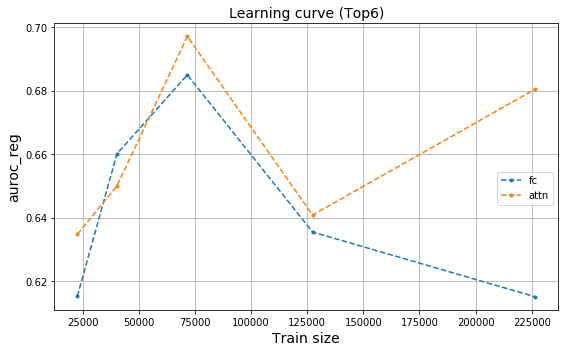

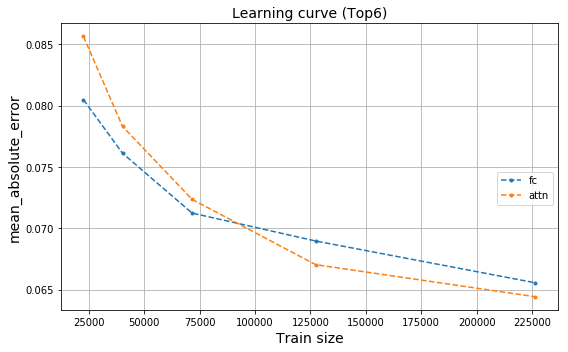

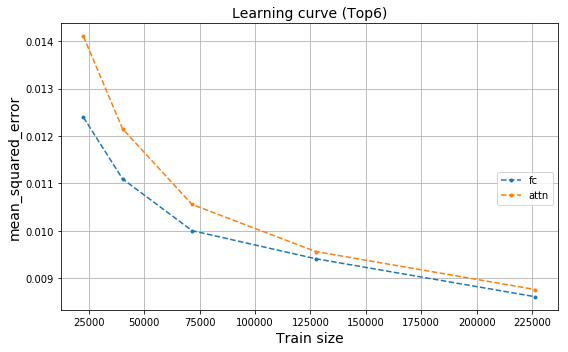

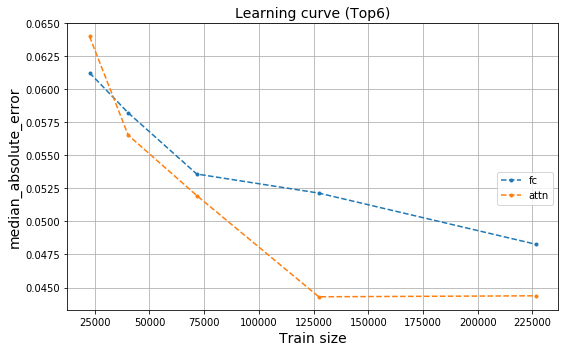

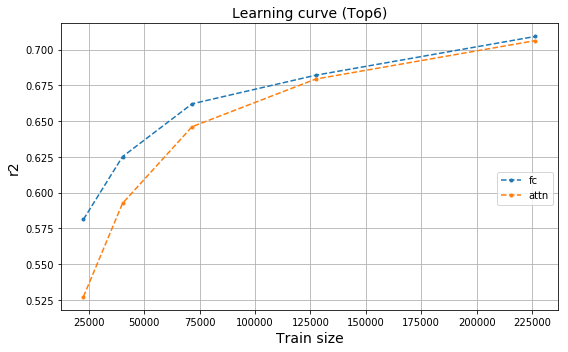

In [9]:
# Same metric for different runs
for j, metric_name in enumerate(scores['metric'].unique()):
    plt.figure(figsize=(8, 5))
    
    for i, (k, v) in enumerate(dd.items()):
        scores = pd.read_csv(dd[k][1])
        kk = scores[(scores['metric'] == metric_name)]
        kk_vl = kk[kk['tr_set'] == False]
        # kk_tr = kk[kk['tr_set'] == True]
        plt.plot(kk_vl['tr_size'], kk_vl['f0'], '.--', label=dd[k][0])
        plt.title('Learning curve (Top6)', fontsize=14)
        plt.xlabel('Train size', fontsize=14)
        plt.ylabel(metric_name, fontsize=14)
        plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
        # plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))

    plt.tight_layout()
    plt.grid(True)
    
    if save:
        plt.savefig( outdir / (metric_name+'.png') )

In [29]:
# https://github.com/bckenstler/CLR

In [37]:
base_lr=0.0001  # 0.001
max_lr=0.001    # 0.006
step_size=2000.
mode='exp_range'
gamma=0.99994
scale_fn=None
scale_mode='cycle'

In [38]:
batch = 32
datasize = 20386
iterations = 20386/batch

In [39]:
cycle = np.floor(1+iterations/(2*step_size))
x = np.abs(iterations/step_size - 2*cycle + 1)
lr= base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))*gamma**(iterations)